# Homework 1

## Overview
This homework will walk you through the process of geospatial data analysis under the short-term rental market (Airbnb) context in New York City. Through this practice, you will get more familiar with pandas, numpy, geopandas, seaborn, and matplotlib modules to retrieve, clean, and visulaize geospatial data. 

## Grading
Each exercise will be graded based on the following rubrics:
- 2 points. Completed the task, presented the expected results, and codes were well documented and explained.
- 1 point. Completed the task with some disparity from the expected results.
- 0 point. Did not complete the excercise.

## Late submission policy
For late submission, every extra day after the due date will lead to 20% off of your points. Less than a day will be counted as one day. All submissions after the TA team posts the answers will not be accepted.

## 1. Retrieve Data
### 1.1 Read the Airbnb Data (2 points)
The first step is to retrieve two datasets from oline resrouces and read one given dataset. Two online resources include the Airbnb lisitng information and the census tract of New York City.

Go to the Airbnb data warehouse http://insideairbnb.com/get-the-data/ and find New York City section:
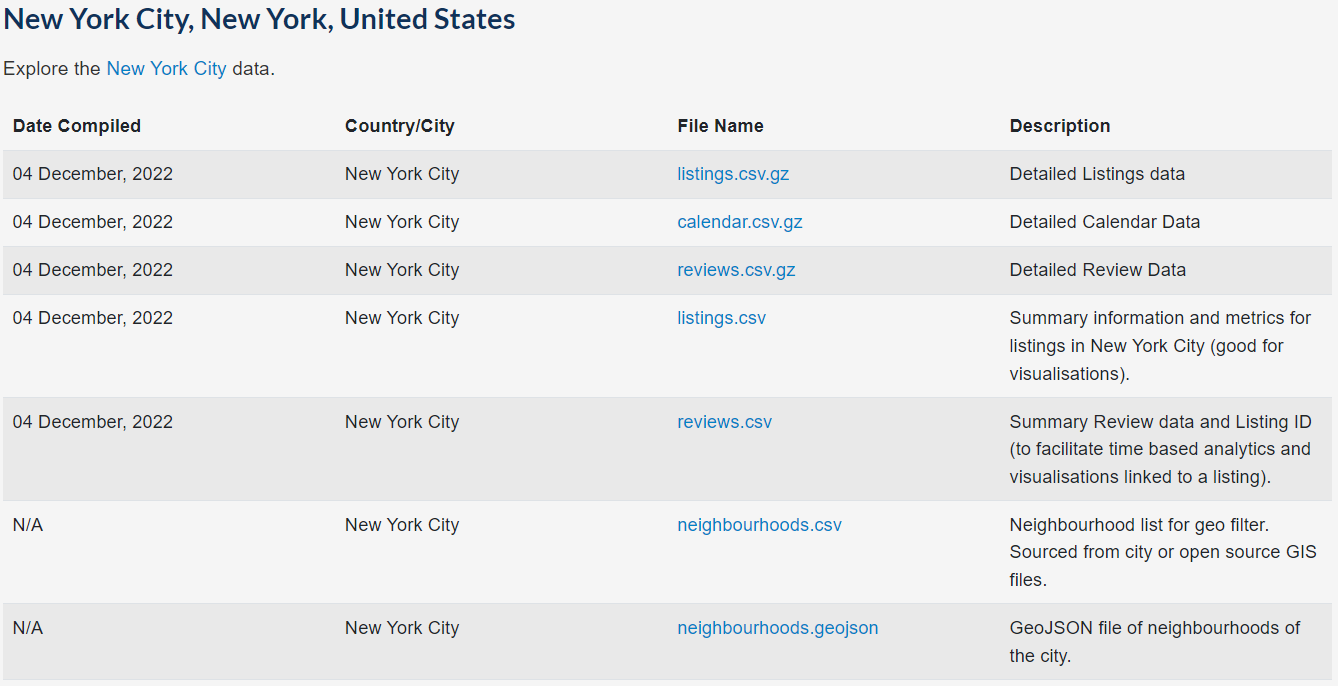

Right click on the hyperlink of the first row and copy the link. Name the dataframe as **listing_raw**. Present the first 5 rows below.

In [1]:
### We are going to start importing the libraries we need
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.getcwd()

/var/folders/_7/lymm6gzn0cd9kkph02m8lhsc0000gn/T/ipykernel_12640/2714465818.py:4: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


'/Users/tangjiaxuan/Library/CloudStorage/OneDrive-个人/Cornell/4_2023_Spring/CRP5680/4680_5680_intro_uds/Homework'

In [2]:
### Read the zipped csv
listing_raw = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/data/listings.csv.gz')

/var/folders/_7/lymm6gzn0cd9kkph02m8lhsc0000gn/T/ipykernel_12640/399568938.py:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  listing_raw = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/data/listings.csv.gz')


In [3]:
### Present the first 5 rows
listing_raw.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.31
1,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,...,4.95,4.94,4.92,NaN,f,1,0,1,0,0.73
2,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,NaN,f,1,1,0,0,0.03
3,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.30
4,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.67,4.56,NaN,f,1,1,0,0,1.13


### 1.2 Retrieve the Census Tracts of New York City (2 points)
Go to NYC Department of planning (https://www.nyc.gov/site/planning/data-maps/open-data/census-download-metadata.page). Unfold the *Census Blocks and Tracts* tab and copy the *GeoJSON* link of *2020 Census Tracts (Clipped to shoreline)*.

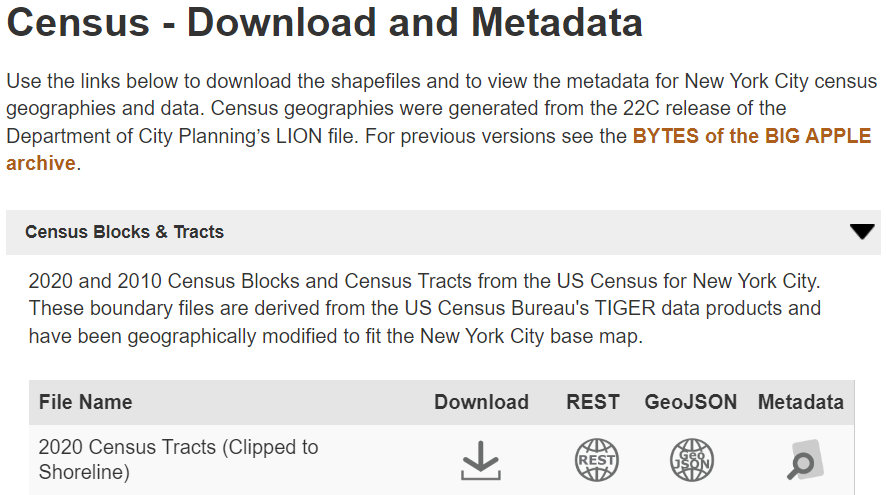

After reading GeoJSON file from the url, assign the dataframe with WGS 84 Geodetic System (epsg = 4326) and name the dataframe as **ct**. Show the first 5 rows of the **ct**.

In [4]:
### Get the Census Tracts and show the first 5 rows
url = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Census_Tracts_for_2020_US_Census/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
ct = gpd.read_file(url).to_crs(epsg=4326)
ct.head()

,OBJECTID,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape__Area,Shape__Length,geometry
0,1,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,1.844391e+06,11022.881754,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ..."
1,2,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,9.723121e+05,4754.495247,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
2,3,6,1,Manhattan,000600,1000600,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,2.582705e+06,6976.286456,"POLYGON ((-73.99022 40.71441, -73.98934 40.714..."
3,4,14.01,1,Manhattan,001401,1001401,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,1.006117e+06,5075.332000,"POLYGON ((-73.98837 40.71645, -73.98754 40.716..."
4,5,14.02,1,Manhattan,001402,1001402,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,1.226206e+06,4459.156019,"POLYGON ((-73.98507 40.71909, -73.98423 40.718..."


### 1.3 Read the Local Dataset (2 points)
Read the demographic information from the given csv file and name it as **demo**. Show the information of **demo** with the function .info().

In [5]:
### Read the given csv as demo and show the info
demo = pd.read_csv('acs_nyc.csv')
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GEOID        2327 non-null   int64  
 1   hh_income    2196 non-null   float64
 2   house_value  1966 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 54.7 KB


## 2. Data Wrangling/Cleaning
### 2.1 Rename the Columns of **ct** (2 points)
Rename the column of *BoroName* as *borough_ct* and column of *NTAName* as *tract_ct*. Show the first 5 rows of **ct**.

In [6]:
### Rename selected columns and show the first 5 rows
ct = ct.rename(columns={'BoroName':'borough_ct', 'NTAName':'tract_ct'})
ct.head()

,OBJECTID,CTLabel,BoroCode,borough_ct,CT2020,BoroCT2020,CDEligibil,tract_ct,NTA2020,CDTA2020,CDTANAME,GEOID,Shape__Area,Shape__Length,geometry
0,1,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,1.844391e+06,11022.881754,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ..."
1,2,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,9.723121e+05,4754.495247,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
2,3,6,1,Manhattan,000600,1000600,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,2.582705e+06,6976.286456,"POLYGON ((-73.99022 40.71441, -73.98934 40.714..."
3,4,14.01,1,Manhattan,001401,1001401,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,1.006117e+06,5075.332000,"POLYGON ((-73.98837 40.71645, -73.98754 40.716..."
4,5,14.02,1,Manhattan,001402,1001402,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,1.226206e+06,4459.156019,"POLYGON ((-73.98507 40.71909, -73.98423 40.718..."


### 2.2 Generate GeometryArray from Latitude and Longitude (2 points)
To conduct geospatial analysis, the geospatial information must be specified. For example, **listing_raw** dataframe contains *latitude* and *longitude* columns, but both columns are treated as the same as the other numeric columns. To specify such geospatial information, an GeometryArray, which contains arrays of positional coordinates to describe Points, needs to be generated.

Now generate an GeometryArray based on the *latitude* and *longitude* columns in **listing_raw** and name the GeometryArray as **geometry**.

In [7]:
### Generate the GeometryArray
geometry = gpd.points_from_xy(listing_raw['longitude'], listing_raw['latitude'])

### 2.3 Transform Dataframe into Geo-dataframe (2 points)
A dataframe can be transformed into a geo-dataframe by adding *geometry* column, which must contain GeometryArray or GeoSeries. With the *geometry* generated above, transform **listing_raw** dataframe into **listing_g** geo-dataframe and assign the dataframe with WGS 84 Geodetic System (epsg = 4326). Present the first 5 rows.

In [8]:
### Generate listing_g and show the first 5 rows
listing_g = gpd.GeoDataFrame(listing_raw, 
                            geometry = geometry,
                            crs='EPSG:4326')
listing_g.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.81,4.40,NaN,f,3,3,0,0,0.31,POINT (-73.98559 40.75356)
1,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,...,4.94,4.92,NaN,f,1,0,1,0,0.73,POINT (-73.96751 40.80380)
2,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,4.67,5.00,NaN,f,1,1,0,0,0.03,POINT (-73.99454 40.66265)
3,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.47,4.52,NaN,f,2,0,2,0,0.30,POINT (-73.95512 40.68535)
4,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.67,4.56,NaN,f,1,1,0,0,1.13,POINT (-73.95342 40.70935)


### 2.4 Remove nan Values (2 points)
Remove all n/a values from *beds* column and drop *bathrooms, calendar_updated, license, and neighbourhood* columns in **listing_g** and name the new dataframe as **listing_s**. Show the first 5 rows of **listing_s**.

In [9]:
### Remove NaN values
listing_s = listing_g.loc[(listing_g['beds'].isna()==False)]
### Drop selected columns
listing_s = listing_s.drop(['bathrooms','calendar_updated','license','neighbourhood'],axis=1)
### The first 5 rows
listing_s.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.80,4.81,4.40,f,3,3,0,0,0.31,POINT (-73.98559 40.75356)
1,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,...,4.95,4.94,4.92,f,1,0,1,0,0.73,POINT (-73.96751 40.80380)
2,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,f,1,1,0,0,0.03,POINT (-73.99454 40.66265)
3,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,f,2,0,2,0,0.30,POINT (-73.95512 40.68535)
4,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.67,4.56,f,1,1,0,0,1.13,POINT (-73.95342 40.70935)


### 2.5 Formatting Column Values (2 points)
For statistical purpose, *price* in the Airbnb listing table must be numeric. In the following cell, remove dollar sign and comma from *price* column in **listing_s** and then transforme the column into float type. Show the first 5 rows of listing_s.

In [10]:
### Remove dollor sign and tramsform datatype, then show the first 5 rows
listing_s['price'] = listing_s['price'].str.replace('$', "").str.replace(',', "").astype(float)
listing_s.head()

/var/folders/_7/lymm6gzn0cd9kkph02m8lhsc0000gn/T/ipykernel_12640/1104815302.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listing_s['price'] = listing_s['price'].str.replace('$', "").str.replace(',', "").astype(float)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.80,4.81,4.40,f,3,3,0,0,0.31,POINT (-73.98559 40.75356)
1,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,...,4.95,4.94,4.92,f,1,0,1,0,0.73,POINT (-73.96751 40.80380)
2,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,f,1,1,0,0,0.03,POINT (-73.99454 40.66265)
3,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,f,2,0,2,0,0.30,POINT (-73.95512 40.68535)
4,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.67,4.56,f,1,1,0,0,1.13,POINT (-73.95342 40.70935)


### 2.6 Unify Column Types of *GEOID* in **ct** and **demo** (2 points)

To merge **ct** and **demo**, *GEOID* will be used as the primary key for both dataframes. However, *GEOID* in **ct** is object but *GEOID* in **demo** is int. Therefore, *GEOID* in both dataframes need to be converted into string.

In [11]:
### Convert datatype of GEOID into string
ct['GEOID'] = ct['GEOID'].astype(str)
demo['GEOID'] = demo['GEOID'].astype(str)

### 2.7 Merge **ct** and **demo** Dataframes (2 points)
Once *GEOID* in both dataframes are in the same type, **ct** and **demo** can be joined. Select only *GEOID*, *borough_ct*, *tract_ct*, and *geometry* columns from **ct** and merge them into **demo**. Present the first 5 rows of the merged dataframe **ct_demo** below.

In [12]:
### Merge the selected columns of ct into demo, and show the first 5 rows
ct_demo = demo.merge(ct[['GEOID','borough_ct','tract_ct','geometry']],left_on='GEOID',right_on='GEOID',how='left')
ct_demo.head()

,GEOID,hh_income,house_value,borough_ct,tract_ct,geometry
0,36005000100,NaN,NaN,Bronx,Rikers Island,"POLYGON ((-73.87287 40.78598, -73.87289 40.785..."
1,36005000200,70867.0,457300.0,Bronx,Soundview-Clason Point,"POLYGON ((-73.85652 40.80525, -73.85653 40.805..."
2,36005000400,98090.0,456100.0,Bronx,Soundview-Clason Point,"POLYGON ((-73.84611 40.81311, -73.84647 40.812..."
3,36005001600,40033.0,587600.0,Bronx,Soundview-Clason Point,"POLYGON ((-73.85514 40.82244, -73.85497 40.821..."
4,36005001901,55924.0,NaN,Bronx,Mott Haven-Port Morris,"POLYGON ((-73.92428 40.80719, -73.92429 40.807..."


Though **ct** has been read as geo-dataframe in step 1.2, the merged dataframe **ct_demo** is treated as a dataframe by default. To transform **ct_demo** into a geo-dataframe, you only need to specify the *geometry* in **ct** as the *geometry* of **ct_demo**. Name the new geo-dataframe as **ct_demo_g** and present the first 5 rows.

In [13]:
### Transform to GeoDataFrame and show the first 5 rows
ct_demo_g = gpd.GeoDataFrame(ct_demo, 
                            geometry = ct_demo['geometry'],
                            crs='EPSG:4326')
ct_demo_g.head()

,GEOID,hh_income,house_value,borough_ct,tract_ct,geometry
0,36005000100,NaN,NaN,Bronx,Rikers Island,"POLYGON ((-73.87287 40.78598, -73.87289 40.785..."
1,36005000200,70867.0,457300.0,Bronx,Soundview-Clason Point,"POLYGON ((-73.85652 40.80525, -73.85653 40.805..."
2,36005000400,98090.0,456100.0,Bronx,Soundview-Clason Point,"POLYGON ((-73.84611 40.81311, -73.84647 40.812..."
3,36005001600,40033.0,587600.0,Bronx,Soundview-Clason Point,"POLYGON ((-73.85514 40.82244, -73.85497 40.821..."
4,36005001901,55924.0,NaN,Bronx,Mott Haven-Port Morris,"POLYGON ((-73.92428 40.80719, -73.92429 40.807..."


### 2.8 Merge Dataframes by Spatial Join (2 points)
Now all information has been stored in geo-dataframe: the census tract and demographic information have been merged into **ct_demo_g** and the Airbnb listing in **listing_s**. However, **ct_demo_g** is based on census tracts (polygons) while **listing_s** is on points. To locate the listing at the census tract level, you are asked to spatial join **ct_demo_g** to **listing_s** if the apartment/house falls into a census tract. Name this new geo-dataframe as **listing**. Remember *geometry* in **listing** should be Points.  Show the first 5 rows below.

In [14]:
### Do the spatial join and show the first 5 rows
listing = gpd.tools.sjoin(ct_demo_g,listing_s,how='right')
listing.head()

,index_left,GEOID,hh_income,house_value,borough_ct,tract_ct,id,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,1286.0,36061011300,81667.0,645800.0,Manhattan,Midtown-Times Square,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,...,4.80,4.81,4.40,f,3,3,0,0,0.31,POINT (-73.98559 40.75356)
1,1388.0,36061019500,105234.0,1044300.0,Manhattan,Upper West Side-Manhattan Valley,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,...,4.95,4.94,4.92,f,1,0,1,0,0.73,POINT (-73.96751 40.80380)
2,482.0,36047014500,106667.0,913600.0,Brooklyn,Sunset Park (West),5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,...,5.00,4.67,5.00,f,1,1,0,0,0.03,POINT (-73.99454 40.66265)
3,559.0,36047022900,122989.0,1196700.0,Brooklyn,Bedford-Stuyvesant (West),5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,...,4.91,4.47,4.52,f,2,0,2,0,0.30,POINT (-73.95512 40.68535)
4,840.0,36047052700,61966.0,1606700.0,Brooklyn,Williamsburg,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,...,4.80,4.67,4.56,f,1,1,0,0,1.13,POINT (-73.95342 40.70935)


## 3. Data Analysis
### 3.1 Mean Listing Price by Borough (2 points)
Find the mean listing price in each borough of New York City and list them below.

In [15]:
### Find the mean listing price in each borough
listing.groupby('borough_ct').mean()['price']

/var/folders/_7/lymm6gzn0cd9kkph02m8lhsc0000gn/T/ipykernel_12640/4252216547.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  listing.groupby('borough_ct').mean()['price']


borough_ct
Bronx            183.198187
Brooklyn         172.757595
Manhattan        302.844283
Queens           134.593544
Staten Island    326.007595
Name: price, dtype: float64

### 3.2 The Most and Least Expensive Census Tracts in NYC (2 points)
Find the 5 most expensive and the 5 least expensive census tracts based on the median price across New York City. You can present the results in seperate cells.

Hint: *GEOID* is the unique ID for each census tract. 

In [16]:
### Calculate the median price for all census tracts
ct_price_median = listing.groupby('GEOID').median()['price']
### Get the GEIOD of the 5 census tracts with lowest median price.
ct_price_median.sort_values().head()

/var/folders/_7/lymm6gzn0cd9kkph02m8lhsc0000gn/T/ipykernel_12640/766412575.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ct_price_median = listing.groupby('GEOID').median()['price']


GEOID
36081047802    16.0
36047043200    26.0
36047021400    29.0
36061024302    29.0
36005007000    30.0
Name: price, dtype: float64

In [17]:
### Get the GEIOD of the 5 census tracts with highest median price.
ct_price_median.sort_values(ascending=False).head()

GEOID
36005011900    5024.0
36005030900    2000.0
36005018400    2000.0
36047001300    1319.0
36047059800    1057.5
Name: price, dtype: float64

### 3.3 The Most and Least Expensive Census Tracts in Manhattan (2 points)
Find the 5 most expensive neighborhoods (using median price) in Manhattan borough. You can present the results in seperate cells. Are they consistent with the 5 most expensive neighborhoods in New York City?

In [18]:
### Calculate the median price for all census tracts in Manhattan
listing_man = listing[listing['borough_ct']=='Manhattan']
ct_price_median_man = listing_man.groupby('GEOID').median()['price']
### Get the GEIOD of the 5 census tracts with lowest median price in Manhattan.
ct_price_median_man.sort_values().head()
### They are not consistent with the 5 least expensive neighborhoods in New York City.

/var/folders/_7/lymm6gzn0cd9kkph02m8lhsc0000gn/T/ipykernel_12640/4196722377.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ct_price_median_man = listing_man.groupby('GEOID').median()['price']


GEOID
36061024302    29.0
36061029100    41.0
36061026700    48.0
36061026900    56.0
36061023502    60.0
Name: price, dtype: float64

In [19]:
### Get the GEIOD of the 5 census tracts with highest median price in Manhattan.
ct_price_median_man.sort_values(ascending=False).head()
### They are not consistent with the 5 most expensive neighborhoods in New York City.

GEOID
36061010200    933.0
36061011900    923.0
36061011300    698.5
36061001300    641.0
36061010100    600.0
Name: price, dtype: float64

### 3.4 The Number of Listing in Each Census Tract (2 points)
Calculate the number of listing in each census tract using group_by function. Add this new column to **ct_demo_g** and create a new geo-dataframe **ct_demo_g_count**. Show the full list below. 

In [20]:
### Calculate the number of listing in each census tract using group_by function
ct_demo_g_count = ct_demo_g.merge(listing.groupby('GEOID').count()['id'],left_on='GEOID',right_index=True,how='left')
ct_demo_g_count = ct_demo_g_count.rename(columns={'id':'count'})
ct_demo_g_count

,GEOID,hh_income,house_value,borough_ct,tract_ct,geometry,count
0,36005000100,NaN,NaN,Bronx,Rikers Island,"POLYGON ((-73.87287 40.78598, -73.87289 40.785...",NaN
1,36005000200,70867.0,457300.0,Bronx,Soundview-Clason Point,"POLYGON ((-73.85652 40.80525, -73.85653 40.805...",6.0
2,36005000400,98090.0,456100.0,Bronx,Soundview-Clason Point,"POLYGON ((-73.84611 40.81311, -73.84647 40.812...",26.0
3,36005001600,40033.0,587600.0,Bronx,Soundview-Clason Point,"POLYGON ((-73.85514 40.82244, -73.85497 40.821...",3.0
4,36005001901,55924.0,NaN,Bronx,Mott Haven-Port Morris,"POLYGON ((-73.92428 40.80719, -73.92429 40.807...",26.0
...,...,...,...,...,...,...,...
2322,36085030302,85842.0,420500.0,Staten Island,Mariner's Harbor-Arlington-Graniteville,"POLYGON ((-74.16050 40.62654, -74.16025 40.626...",5.0
2323,36085031901,NaN,288300.0,Staten Island,Mariner's Harbor-Arlington-Graniteville,"POLYGON ((-74.16050 40.62654, -74.16118 40.626...",4.0
2324,36085031902,76066.0,381600.0,Staten Island,Mariner's Harbor-Arlington-Graniteville,"POLYGON ((-74.16023 40.63835, -74.16015 40.638...",10.0
2325,36085032300,86471.0,237100.0,Staten Island,Mariner's Harbor-Arlington-Graniteville,"POLYGON ((-74.17119 40.64175, -74.17129 40.640...",7.0


## 4 Visualize Data
### 4.1 Relationship between the Price and Household Income (2 points)
*hh_income* column contains the median household income by each census tract. Use the median listing price as the y axis and the household income as the x axis to draw scatter plot below.

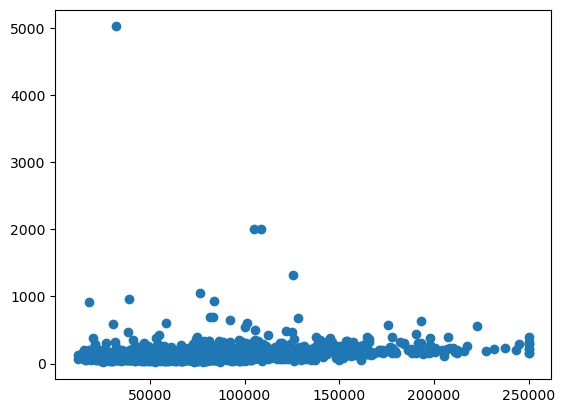

In [21]:
### Join the median price to ct_demo_g_count
ct_demo_g_count_w_price = ct_demo_g_count.merge(ct_price_median,left_on='GEOID',right_index=True,how='left')
### Use the median listing price as the y axis and the household income as the x axis to draw scatter plot below.
plt.scatter(ct_demo_g_count_w_price['hh_income'],ct_demo_g_count_w_price['price'],marker='o');

### 4.2 Relationship between the Price and Housing Value (2 points)
*house_value* column contains the median housing value by each census tract. Use the median listing price as the y axis and the housing value as the x axis to draw scatter plot below.

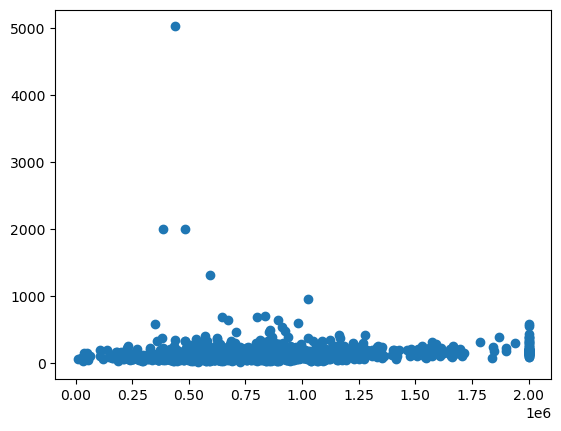

In [22]:
### Use the median listing price as the y axis and the housing value as the x axis to draw scatter plot below.
plt.scatter(ct_demo_g_count_w_price['house_value'],ct_demo_g_count_w_price['price'],marker='o');

### 4.3 Mapping the Listing and Census Tracts (8 points)
Plot all the listing and census tracts on the same figure. 
- Change the title to *2022 New York City Airbnb Listing* and name the x-y axis as longitude and latitude. (2 points)

Out of aesthetic purpose, 
- Change the transparency of census tracts and listing points to 0.2. (2 points) 
- Change the size of listing points to 0.4. (2 points)
- Add *grey* edge color to census tracts. (2 points)

Show your map below.

<AxesSubplot: title={'center': '2022 New York City Airbnb Listing'}, xlabel='Longitude', ylabel='Latitude'>

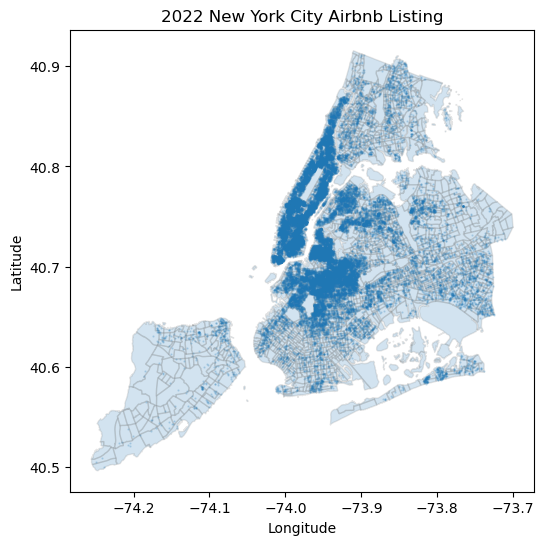

In [23]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('2022 New York City Airbnb Listing')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ct_demo_g.plot(ax=ax,alpha=.2,edgecolor='grey')
listing.plot(ax=ax,alpha=.2,markersize=.4)

### 4.4 Choropleth Map on the Number of Listing (8 points)
Plot the number of listing by census tracts. 
- Change the title to *2022 New York City Airbnb: the Number of Listing by Census Tract* and name the x-y axis as longitude and latitude. (2 points)
- Use *quantile* as the scheme and specify the quantile number as 5. Use color set *OrRd*. (2 points)

For aesthetic purpose,
- Add legend to the map and do not let it overlap with any census tract. (2 points) 
- Add *grey* edge color to census tracts and specify the edge width as 0.2. (2 points)

<AxesSubplot: title={'center': '2022 New York City Airbnb: the Number of Listing by Census Tract'}, xlabel='Longitude', ylabel='Latitude'>

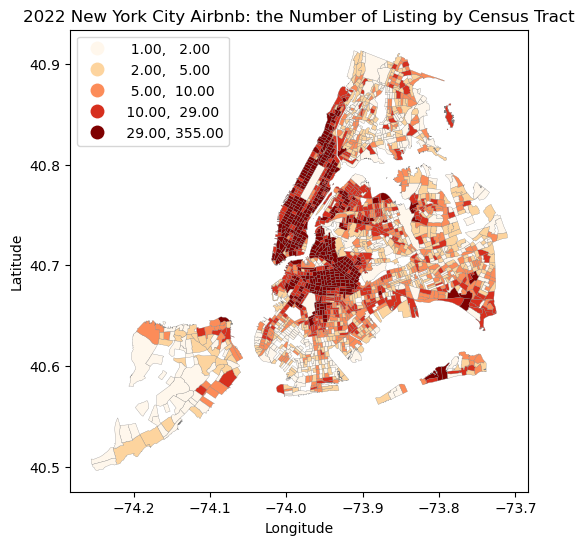

In [31]:
import mapclassify
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('2022 New York City Airbnb: the Number of Listing by Census Tract')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ct_demo_g_count.plot(column='count',ax=ax,edgecolor='grey',legend=True,scheme='Quantiles',k=5,linewidth=0.2,legend_kwds={'loc': 'upper left'},cmap='OrRd')

### 4.4 Choropleth Map on the Median Housing Value (2 points)
Plot the median housing value by census tracts. 
- Change the title to *2022 New York City Airbnb: the Median Housing Value by Census Tract* and name the x-y axis as longitude and latitude.
- Use *quantile* as the scheme and specify the quantile number as 5. Use color set *OrRd*.

For aesthetic purpose,
- Add legend to the map and do not let it overlap with any census tract.
- Add *grey* edge color to census tracts and specify the edge width as 0.2.

<AxesSubplot: title={'center': '2022 New York City Airbnb: the Median Housing Value by Census Tract'}, xlabel='Longitude', ylabel='Latitude'>

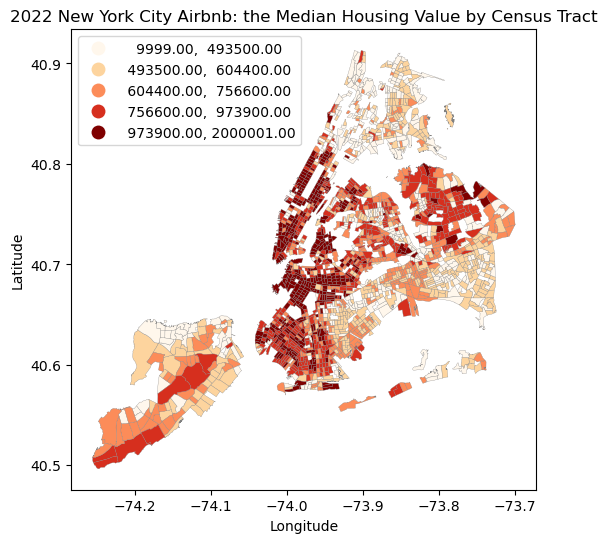

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('2022 New York City Airbnb: the Median Housing Value by Census Tract')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ct_demo_g_count.plot(column='house_value',ax=ax,edgecolor='grey',legend=True,scheme='Quantiles',k=5,linewidth=0.2,legend_kwds={'loc': 'upper left'},cmap='OrRd')

### 4.4 Choropleth Map on the Median Household Income (2 points)
Plot the median household income by census tracts.
- Change the title to *2022 New York City Airbnb: the Median Household Income by Census Tract* and name the x-y axis as longitude and latitude.
- Use quantile as the scheme and specify the quantile number as 5. Use color set *BuPu*.

For aesthetic purpose,
- Add legend to the map and do not let it overlap with any census tract.
- Add grey edge color to census tracts and specify the edge width as 0.2.

<AxesSubplot: title={'center': '2022 New York City Airbnb: the Median Household Income by Census Tract'}, xlabel='Longitude', ylabel='Latitude'>

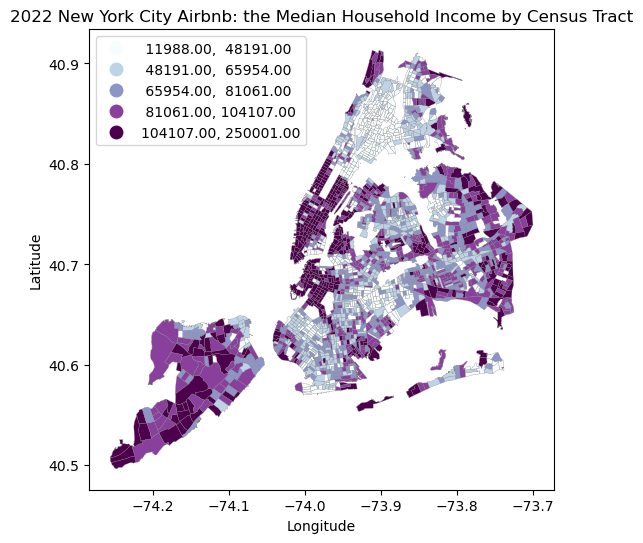

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('2022 New York City Airbnb: the Median Household Income by Census Tract')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ct_demo_g_count.plot(column='hh_income',ax=ax,edgecolor='grey',legend=True,scheme='Quantiles',k=5,linewidth=0.2,legend_kwds={'loc': 'upper left'},cmap='BuPu')